In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/data/insurance.csv")

In [3]:
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

Text(0.5, 1.0, 'Historgam of Charges')

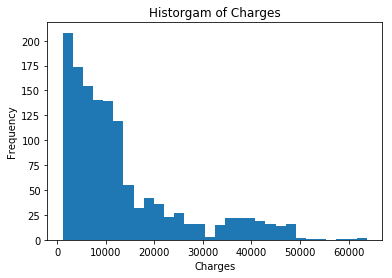

In [10]:
plt.hist(df.charges, bins = 30)
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.title("Historgam of Charges")

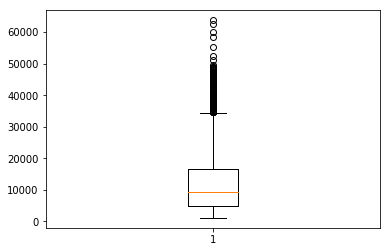

In [12]:
plt.boxplot(df.charges);

In [13]:
import numpy as np

In [18]:
a = np.array([7, 9, 10, 3, 4, 8, 4])
a.sort()
a

array([ 3,  4,  4,  7,  8,  9, 10])

In [20]:
np.percentile(a, [25, 50, 75])

array([4. , 7. , 8.5])

In [26]:
y = df.charges
def get_outlier(y):
    q1, q3 = np.percentile(y, [25, 75])
    iqr = q3 - q1 # Inter quartile range
    upper_whisker = min(np.max(y), q3 + 1.5 * iqr)
    lower_whisker = max(np.min(y), q1 - 1.5 * iqr)
    outliers = (y > upper_whisker) | (y < lower_whisker)
    print("upper_whisker: ", upper_whisker, "lower whisker: ", lower_whisker)
    return outliers
df[get_outlier(y)]

upper_whisker:  34489.350562499996 lower whisker:  1121.8739


,age,gender,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
34,28,male,36.400,1,yes,southwest,51194.55914
38,35,male,36.670,1,yes,northeast,39774.27630
39,60,male,39.900,0,yes,southwest,48173.36100
49,36,male,35.200,1,yes,southeast,38709.17600
53,36,male,34.430,0,yes,southeast,37742.57570


In [27]:
df[get_outlier(y)].shape

upper_whisker:  34489.350562499996 lower whisker:  1121.8739


(139, 7)

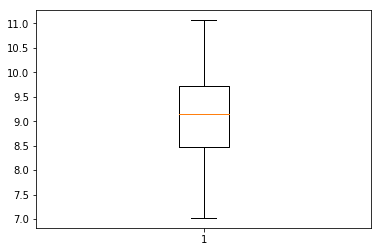

In [29]:
plt.boxplot(np.log(df.charges));

In [31]:
a = np.array([7, 9, 10, 3, 4, 8, 4, 100])
np.mean(a), np.median(a)

(18.125, 7.5)

In [32]:
a = np.array([7, 9, 10, 3, 4, 8, 4])
np.mean(a), np.median(a)

(6.428571428571429, 7.0)

In [33]:
df.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Frequency plot by region')

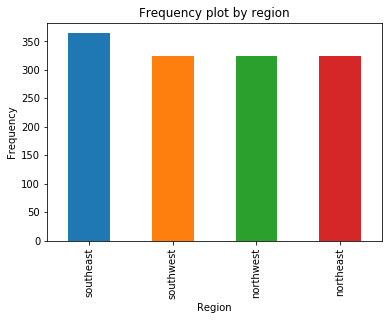

In [39]:
df.region.value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Frequency plot by region")

Text(0.5, 1.0, 'Frequency plot by region')

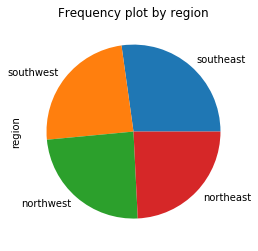

In [41]:
df.region.value_counts().sort_values(ascending = False).plot.pie()
plt.title("Frequency plot by region")

Text(0.5, 1.0, 'Scatter plot: charges by age')

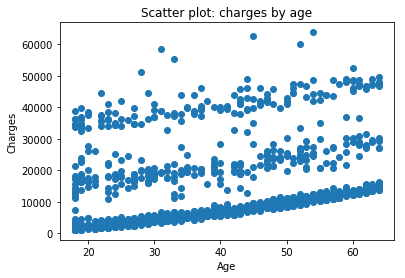

In [43]:
plt.scatter(df.age, df.charges)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Scatter plot: charges by age")

Text(0.5, 1.0, 'Scatter plot: charges by age')

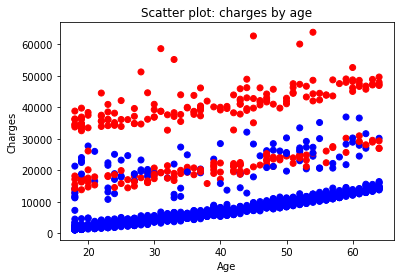

In [45]:
colors = np.where(df.smoker == "yes", "red", "blue")
plt.scatter(df.age, df.charges, color = colors)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Scatter plot: charges by age")

Text(0, 0.5, 'Median charges')

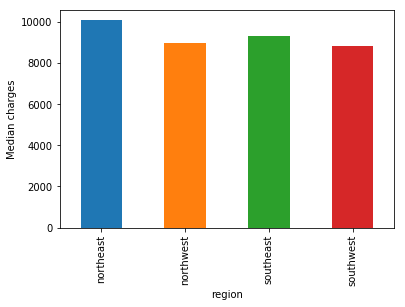

In [49]:
df.groupby("region").charges.median().plot.bar()
plt.ylabel("Median charges")

In [52]:
agg = df.pivot_table("charges", "region", "gender")
agg

gender,female,male
region,,
northeast,12953.203151,13854.005374
northwest,12479.870397,12354.119575
southeast,13499.669243,15879.617173
southwest,11274.411264,13412.883576


In [53]:
import seaborn as sns

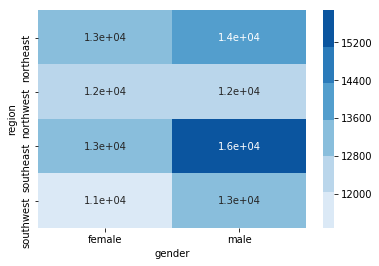

In [56]:
sns.heatmap(agg, annot=True, cmap=sns.color_palette("Blues"))

In [58]:
df = pd.read_csv("https://api.blockchain.info/charts/market-price?format=csv&timespan=all", header = None)
df

,0,1
0,2009-01-03 00:00:00,0.000000
1,2009-01-05 00:00:00,0.000000
2,2009-01-07 00:00:00,0.000000
3,2009-01-09 00:00:00,0.000000
4,2009-01-11 00:00:00,0.000000
5,2009-01-13 00:00:00,0.000000
6,2009-01-15 00:00:00,0.000000
7,2009-01-17 00:00:00,0.000000
8,2009-01-19 00:00:00,0.000000
9,2009-01-21 00:00:00,0.000000


In [62]:
df.index = pd.to_datetime(df[0])

In [63]:
df.head()

,0,1
0,,
2009-01-03,2009-01-03 00:00:00,0.0
2009-01-05,2009-01-05 00:00:00,0.0
2009-01-07,2009-01-07 00:00:00,0.0
2009-01-09,2009-01-09 00:00:00,0.0
2009-01-11,2009-01-11 00:00:00,0.0


In [64]:
del df[0]

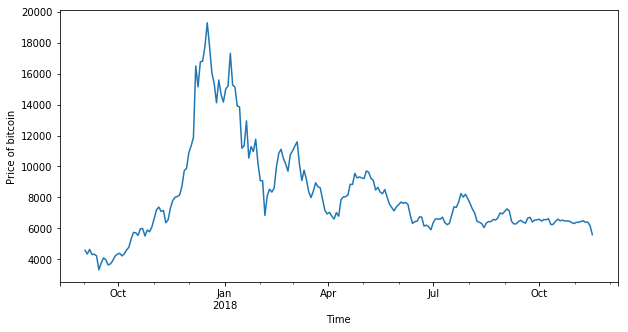

In [75]:
plt.figure(figsize = (10, 5))
df[1].loc["2017-09":].plot()
plt.xlabel("Time")
plt.ylabel("Price of bitcoin")

plt.savefig("bitcoin.pdf")